In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%config InlineBackend.figure_format='retina'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
from IPython.display import display, HTML
from matplotlib import colors as mcols

In [5]:
maindir = pathlib.Path("/data/Marjan/Manami/raw_data/")

In [9]:
allDFs = []
isletCount = 0
for subdir in maindir.iterdir():
    if subdir.is_file(): continue
    specie = subdir.parts[-1]
    print ("="*30)
    print (f"importing {specie}")
    print ("="*30)
    xlsxfiles = sorted(list(subdir.glob("Mesh*.xlsx")), key = lambda xi: int(str(xi).split("/Mesh")[1].split("_")[0]),)
    for fn in xlsxfiles:
        print(fn)
        df = pd.read_excel(fn, sheet_name=None)
        variables = list(df.keys())

        for var in variables:
            df[var].columns = df[var].columns[::-1]
            df[var].set_index("Frame 0", inplace=True)
            varc = df[var].columns[0]
            df[var] = df[var][varc]
        df = pd.DataFrame(df.values()).T
        validIxs = [ix for ix in df.index if "segment" in ix.lower()]
        df = df.loc[validIxs]
        df['specie'] = specie
        df['islet'] = str(isletCount)
        df['file'] = fn.parts[-1]
        isletCount += 1
        allDFs += [df]
#         break
#     break

importing Ferret
/data/Marjan/Manami/raw_data/Ferret/Mesh1_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh2_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh3_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh4_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh5_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh6_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh7_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh8_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh9_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh10_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh11_Ferret 2 3of3_3D Neuron Analysis - FL.xlsx
/data/Marjan/Manami/raw_data/Ferret/Mesh12_Fer

/data/Marjan/Manami/raw_data/Pig/Mesh20_Pig 4-27 C1 1_1 5_2_21_29_TileScan 2_Merged_3D Neuron Analysis - FL.xlsx


In [10]:
data = pd.concat(allDFs, ignore_index=True)

In [11]:
data.isna().any()

Mean Diameter (µm)                  False
Branch Count                        False
Spine Count                         False
Branch Angle                        False
Total Path Length (µm)              False
Longest Path Length (µm)            False
Shortest Path Length (µm)           False
Branch Order                        False
Max Child Branch Order              False
Mean Tortuosity (µm)                False
Min Tortuosity (µm)                 False
Max Tortuosity (µm)                 False
Std. Dev. Tortuosity (µm)           False
Surface Area (µm²)                  False
Volume (µm³)                        False
Center Line Length (µm)             False
Straight Center Line Length (µm)    False
Average Length (µm)                 False
Top 5 Percent Length                False
CV of Lengths                       False
Average Angle                       False
specie                              False
islet                               False
file                              

In [12]:
variables = data.select_dtypes("number").columns

In [13]:
species = data['specie'].unique()

In [182]:
from islets.numeric import jitter

In [222]:
from scipy.stats import median_abs_deviation
from islets.numeric import mad2std
from scipy.stats import shapiro
import statsmodels.api as sm
import islets._manuscript_functions as mf

minN = 5
toll = 3


In [283]:
from tqdm.notebook import tqdm

  0%|          | 0/21 [00:00<?, ?it/s]

Mean Diameter (µm)
Dataset looks more normal-like in log scale


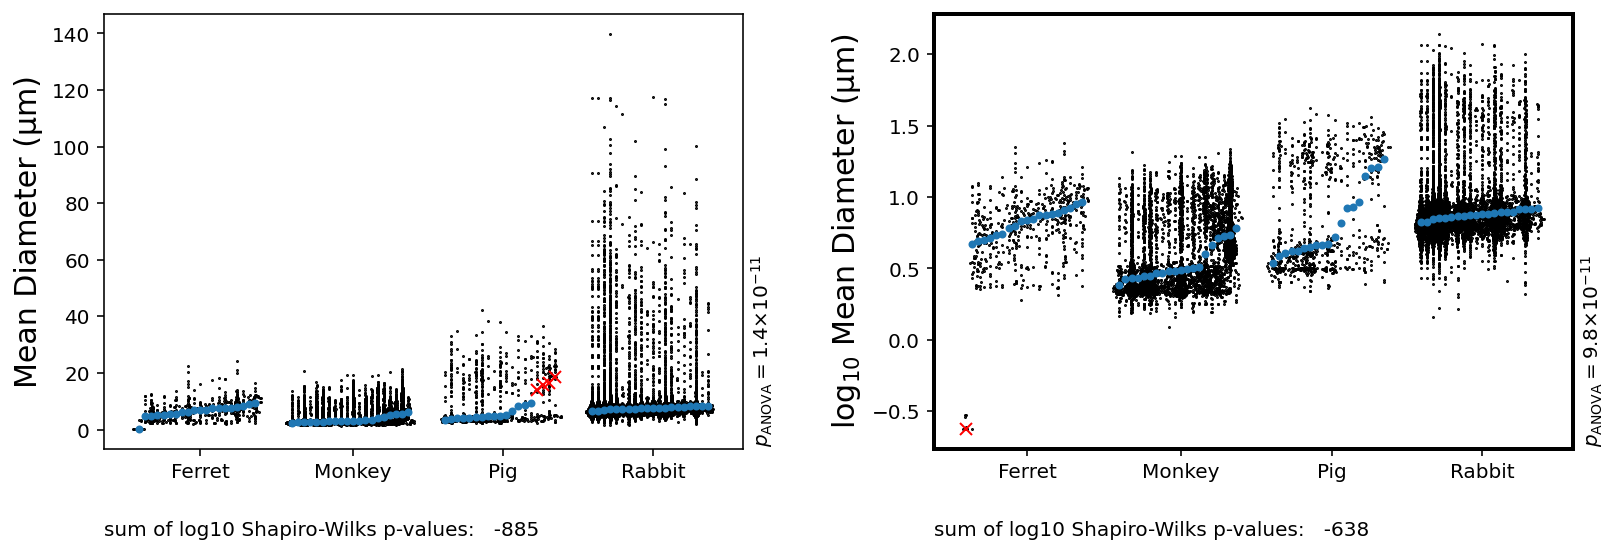

Branch Count
Dataset looks more normal-like in lin scale


/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


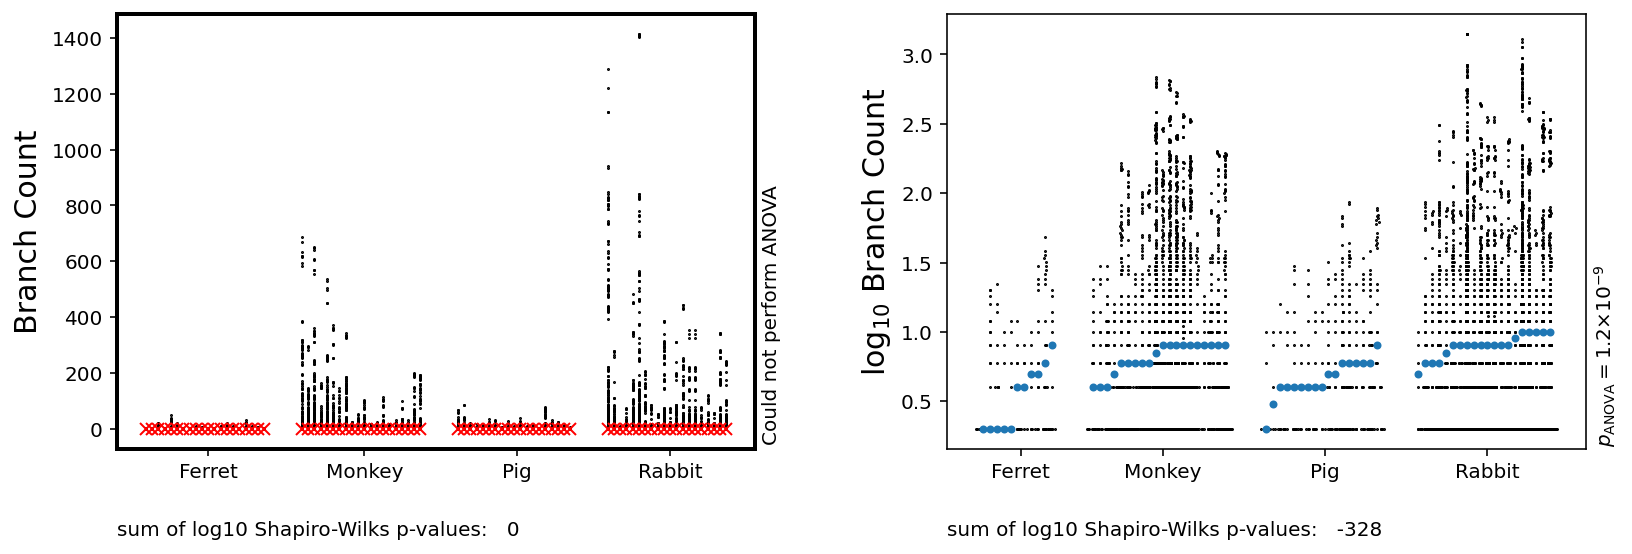

Spine Count
logging this is meaningless, skipping analysis on logged dataset
Dataset looks more normal-like in lin scale


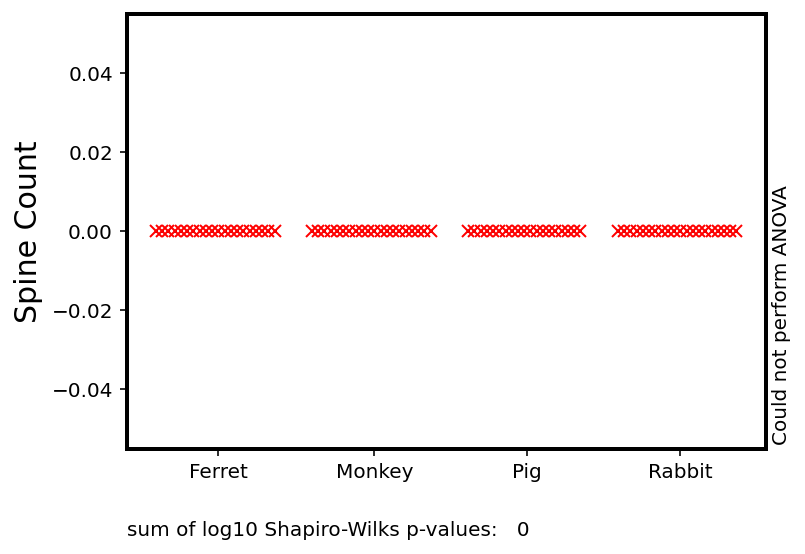

Branch Angle
Angles need to be looked at in linear scale.


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


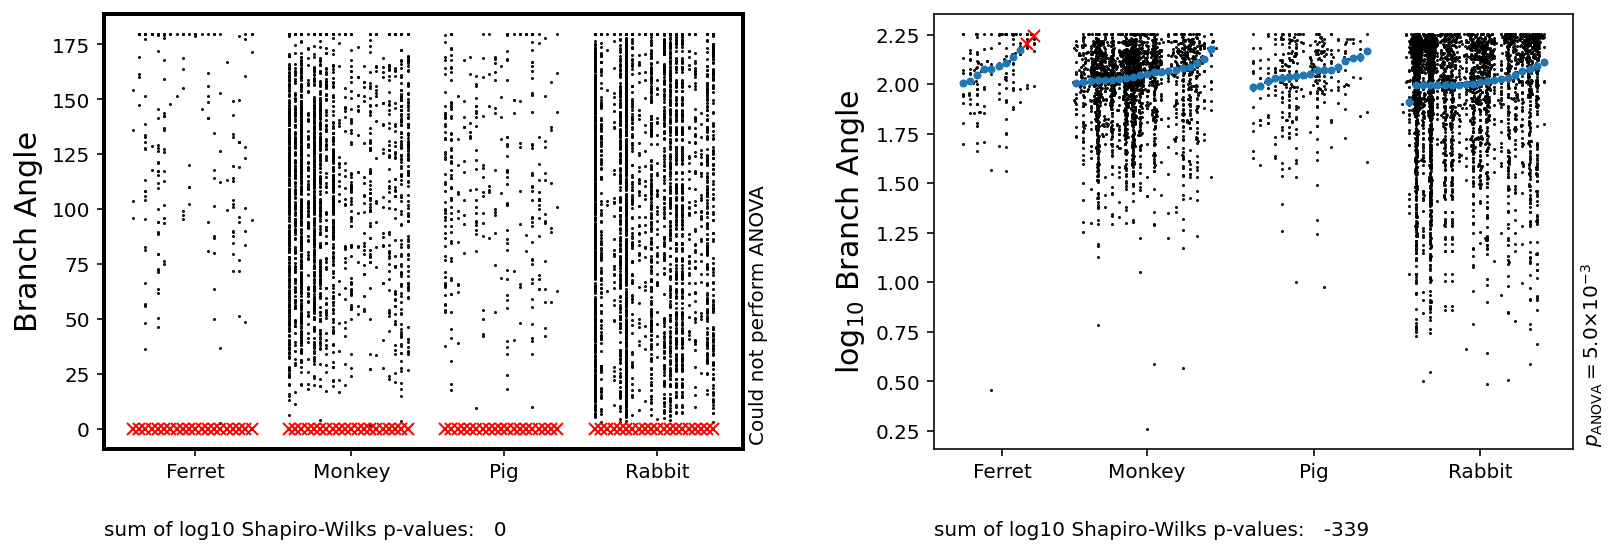

Total Path Length (µm)
Dataset looks more normal-like in log scale


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


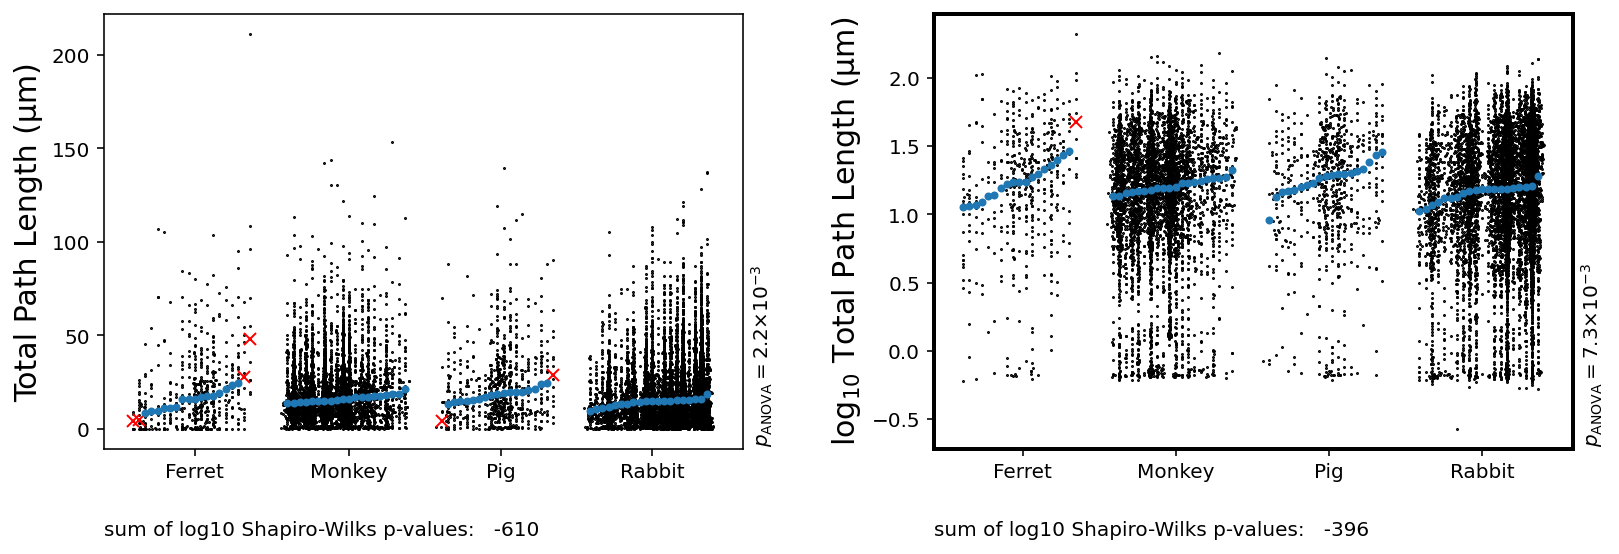

Longest Path Length (µm)
Dataset looks more normal-like in lin scale


/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  r

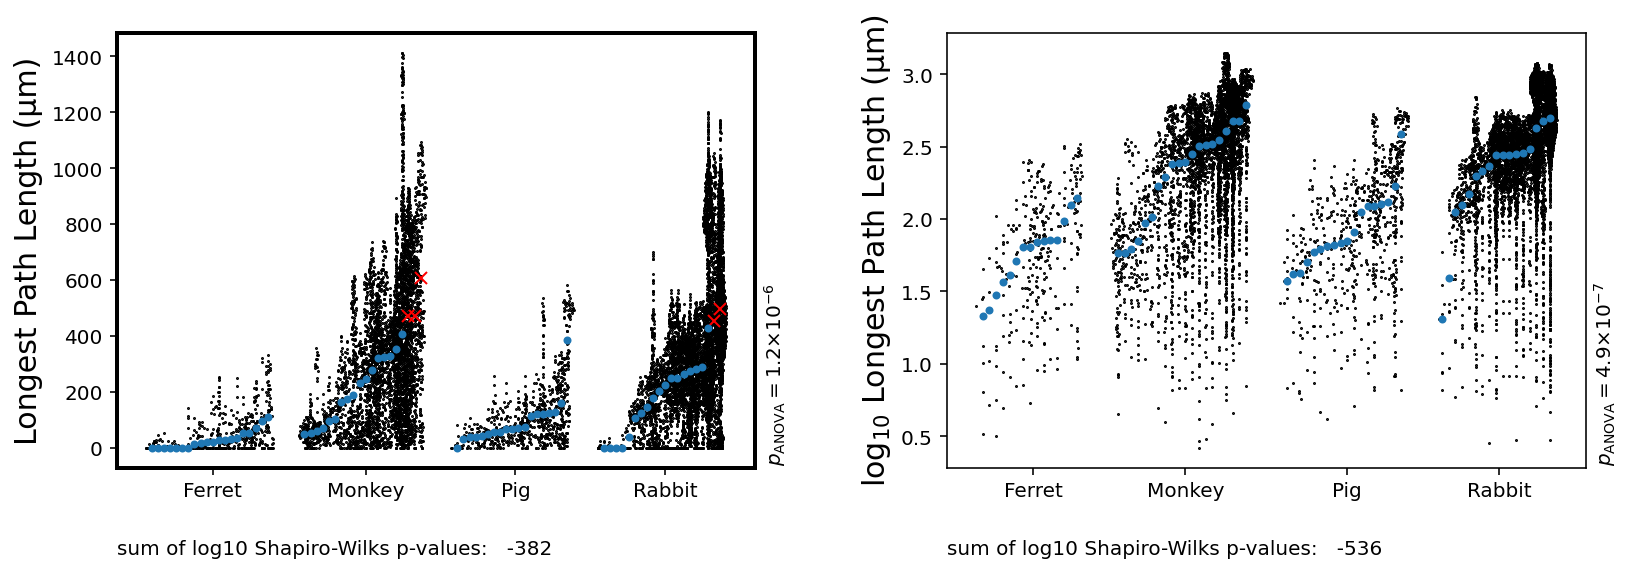

Shortest Path Length (µm)
Dataset looks more normal-like in lin scale


/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  r

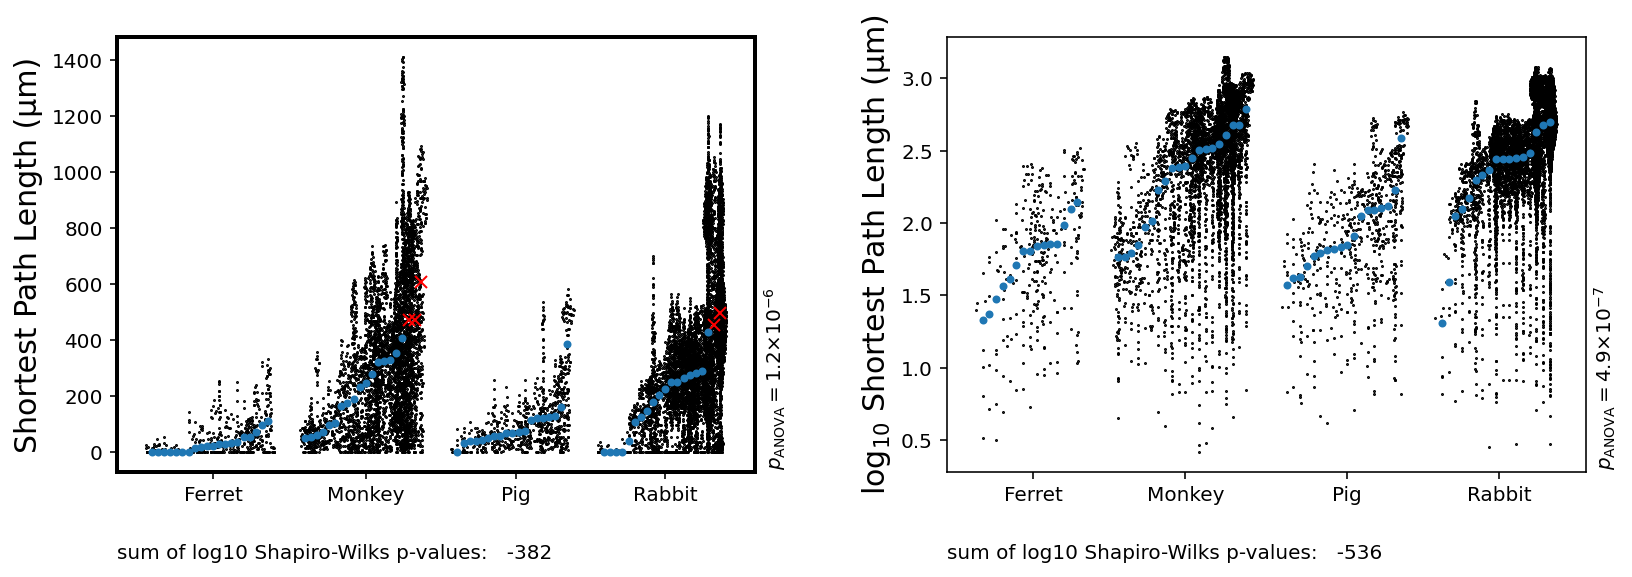

Branch Order
Dataset looks more normal-like in lin scale


/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/tlj

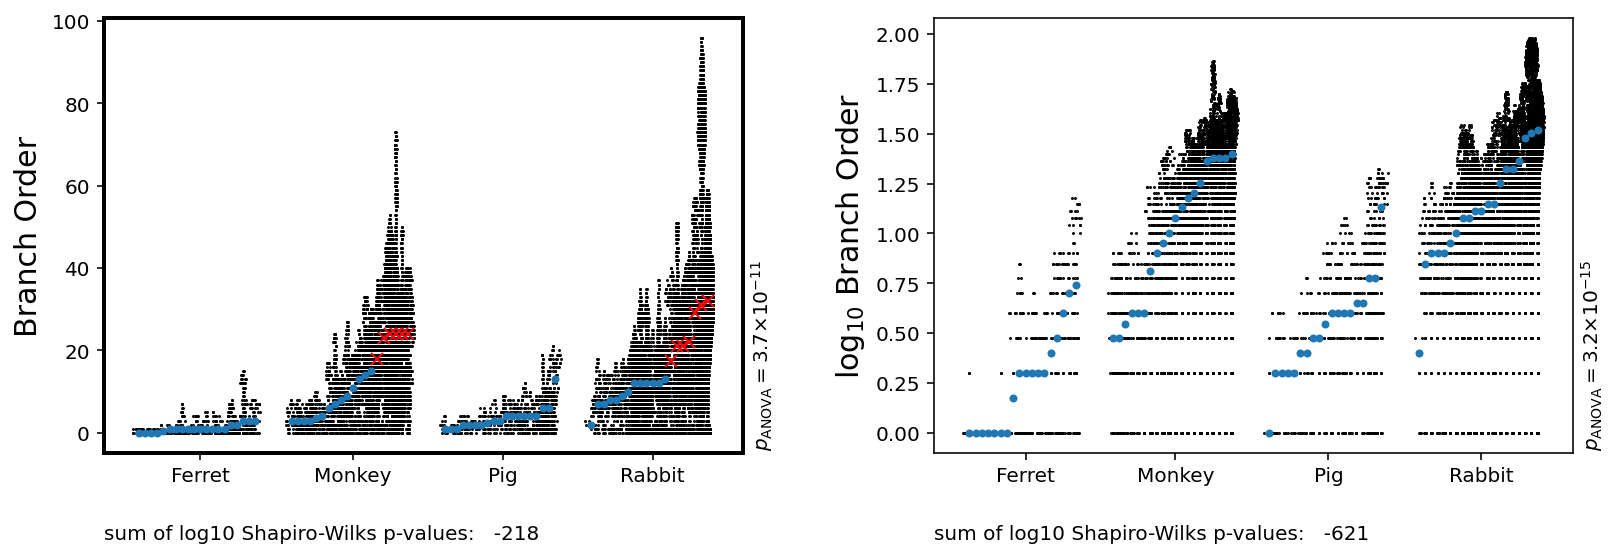

Max Child Branch Order
Dataset looks more normal-like in lin scale


/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


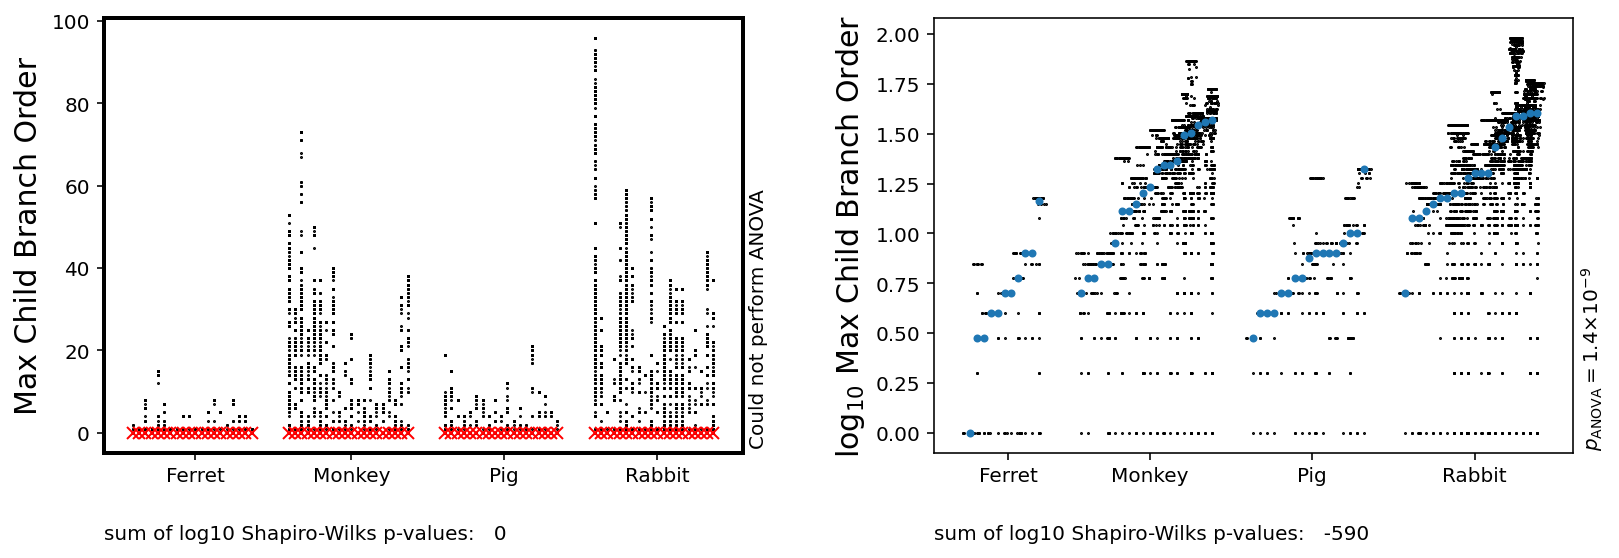

Mean Tortuosity (µm)
Dataset looks more normal-like in log scale


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


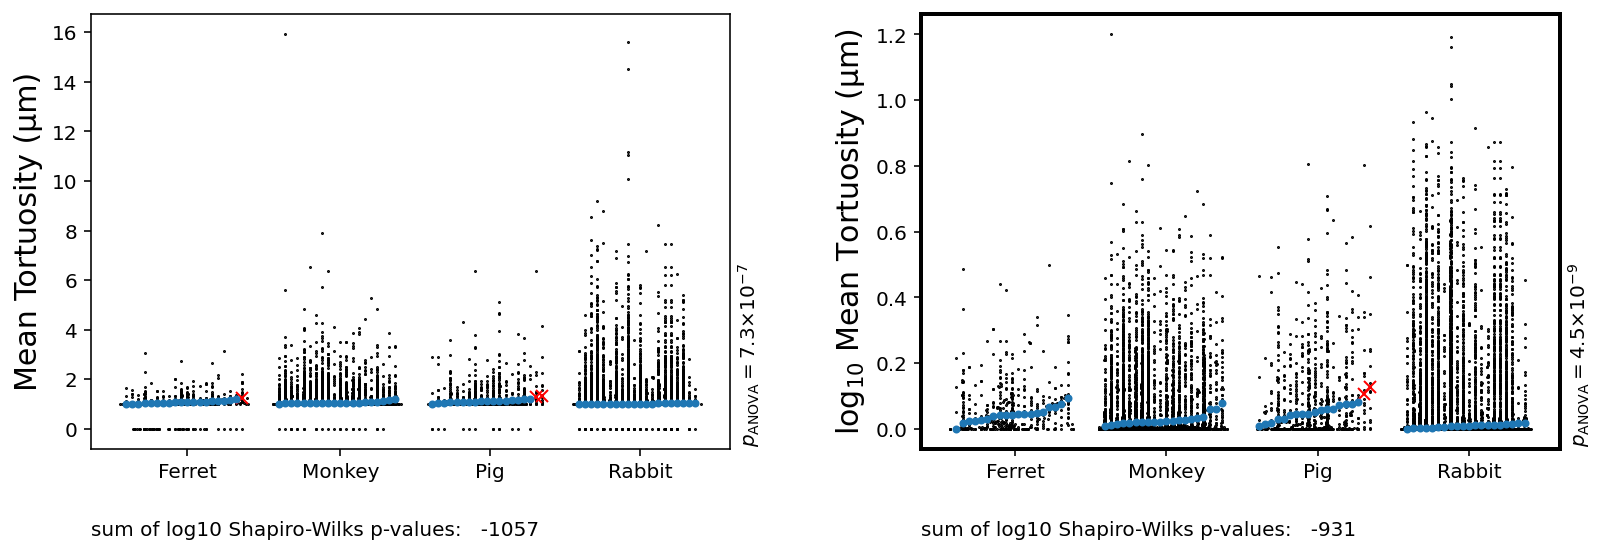

Min Tortuosity (µm)
Dataset looks more normal-like in log scale


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


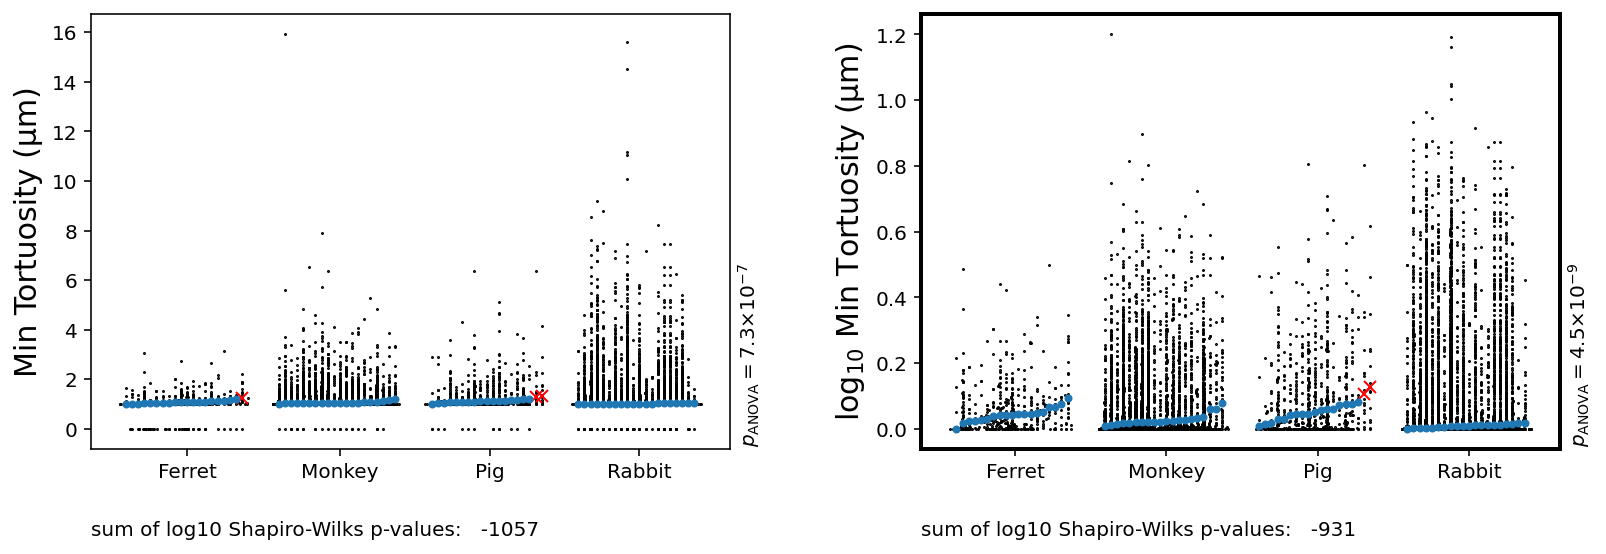

Max Tortuosity (µm)
Dataset looks more normal-like in log scale


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


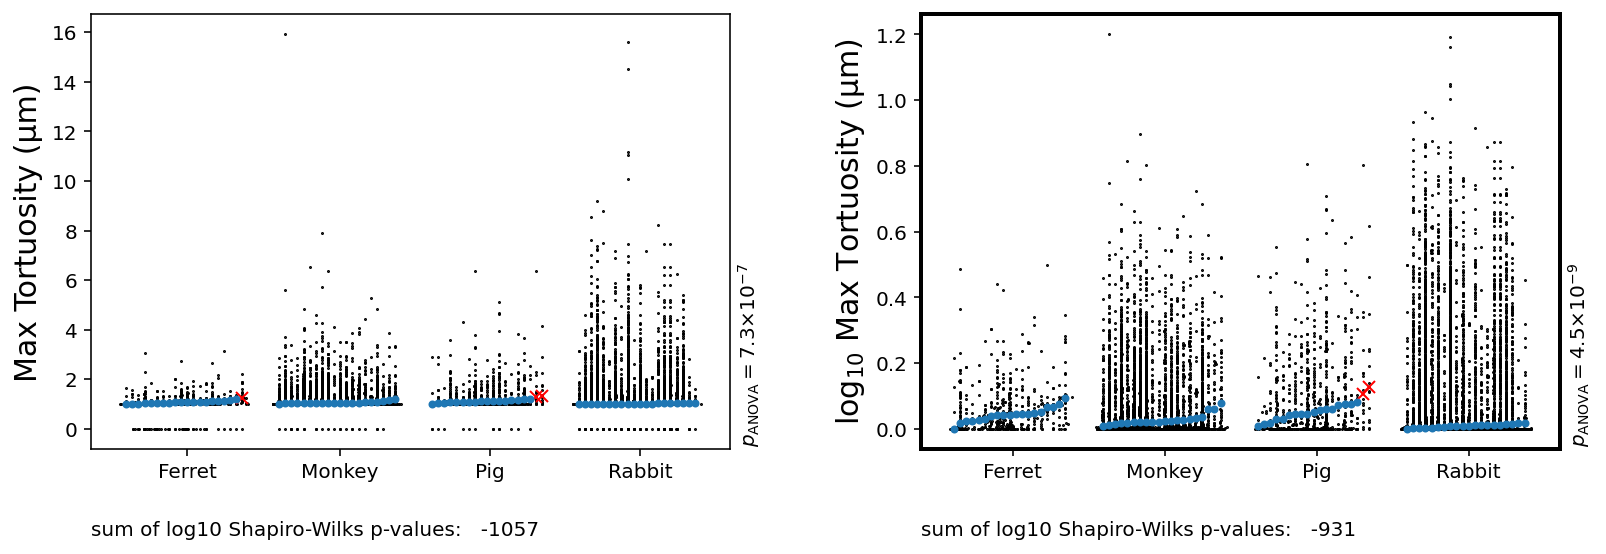

Std. Dev. Tortuosity (µm)
logging this is meaningless, skipping analysis on logged dataset
Dataset looks more normal-like in lin scale


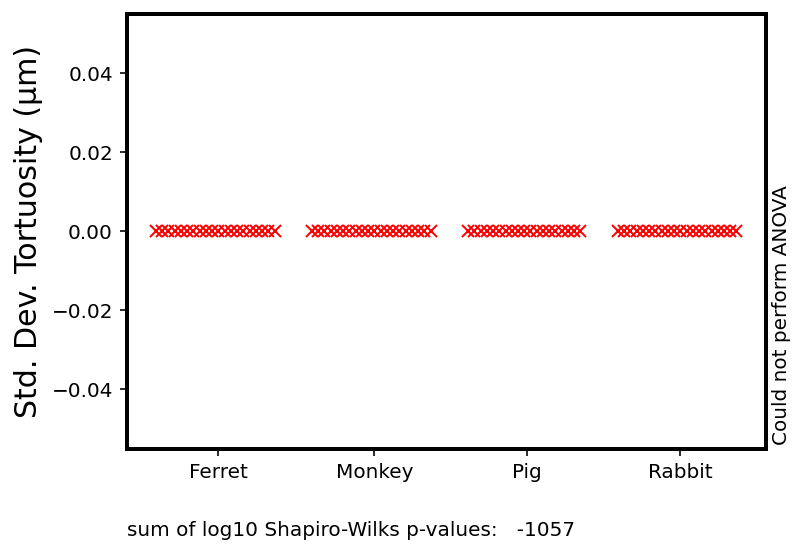

Surface Area (µm²)
Dataset looks more normal-like in log scale


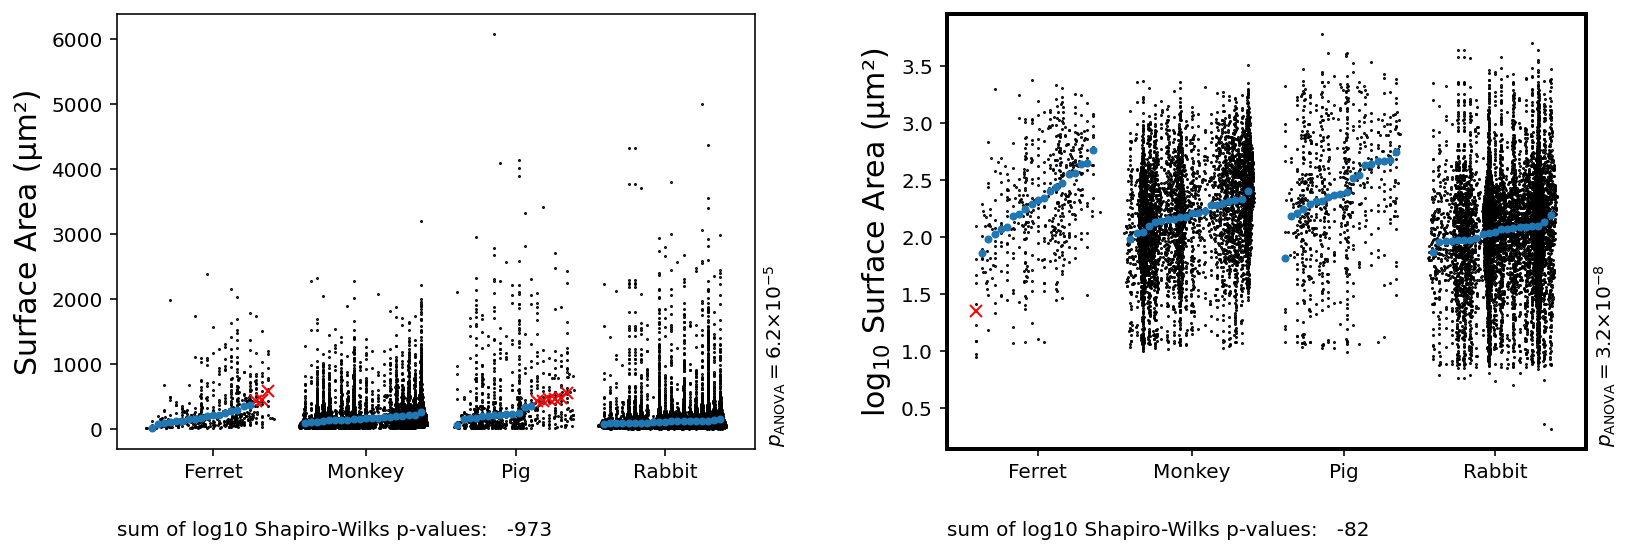

Volume (µm³)
Dataset looks more normal-like in log scale


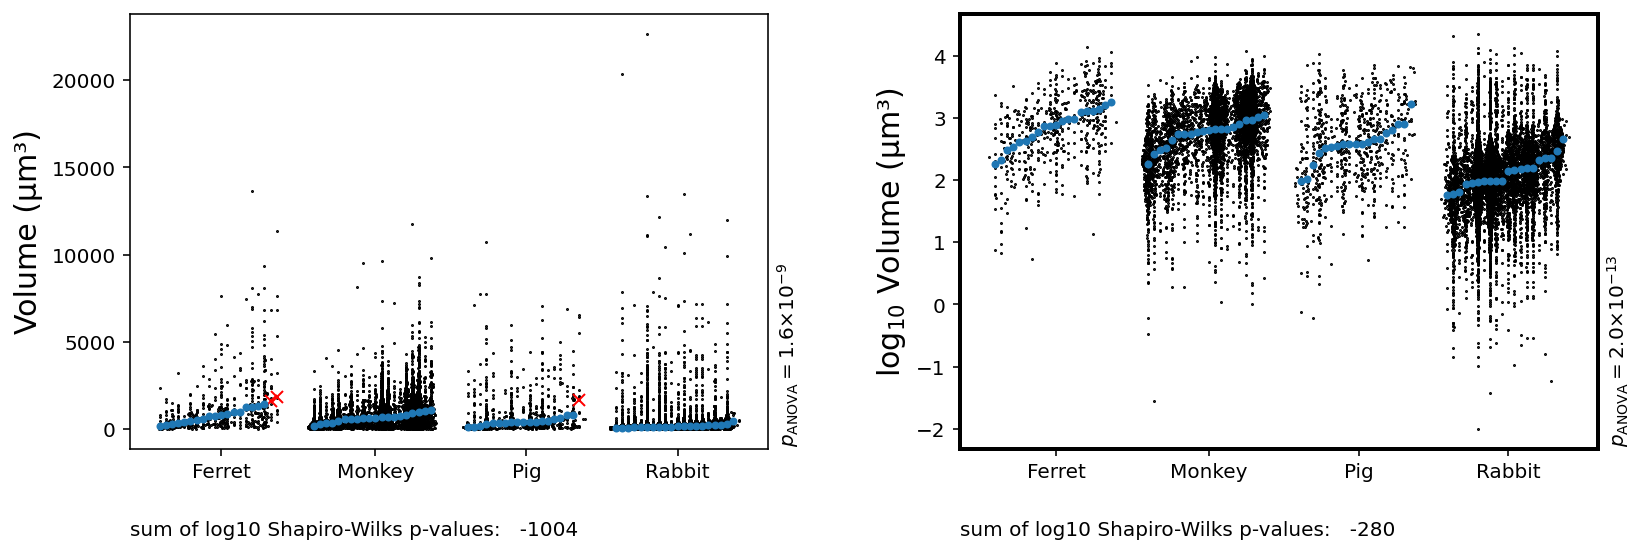

Center Line Length (µm)
Dataset looks more normal-like in log scale


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


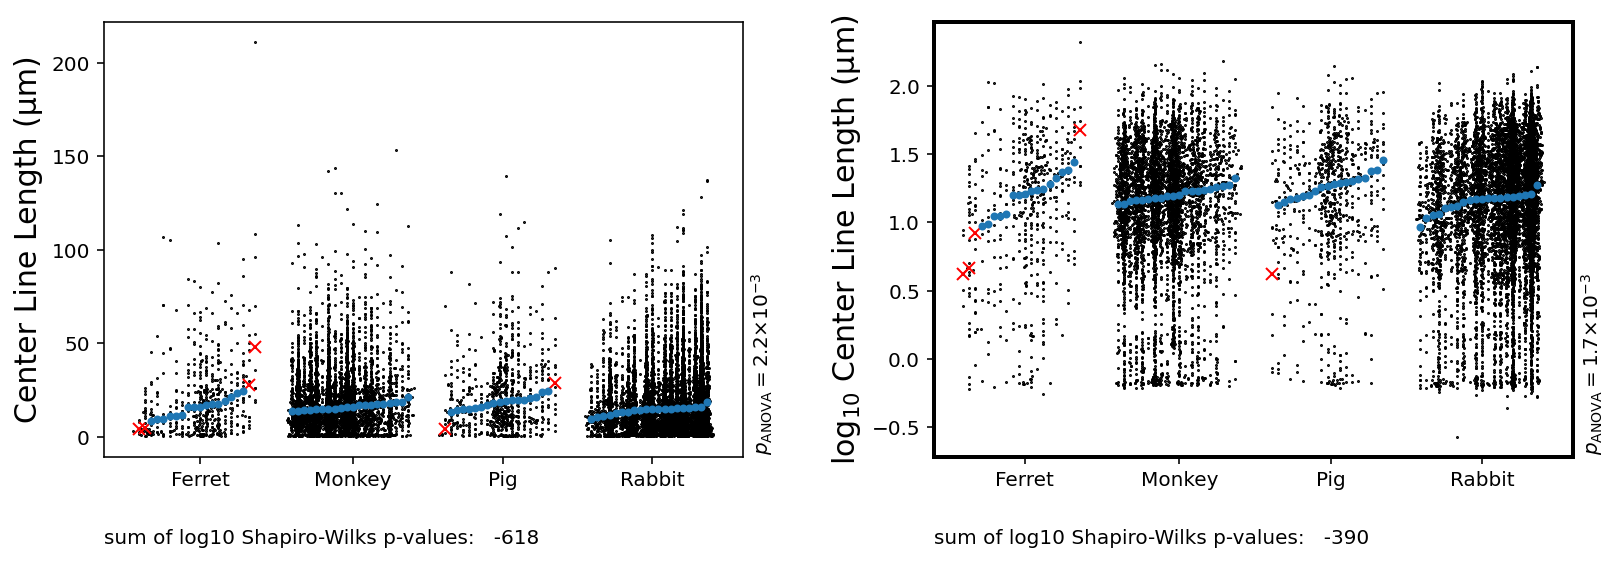

Straight Center Line Length (µm)
Dataset looks more normal-like in log scale


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


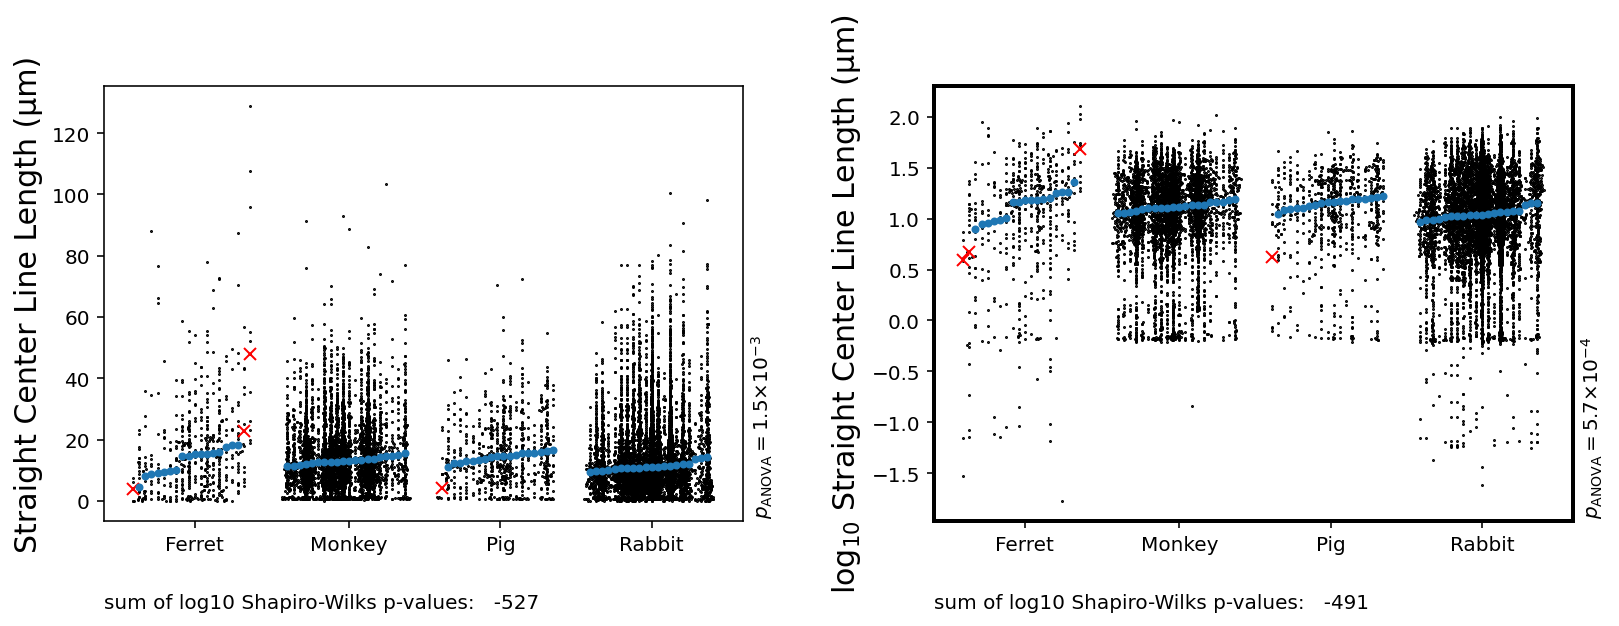

Average Length (µm)
Dataset looks more normal-like in log scale


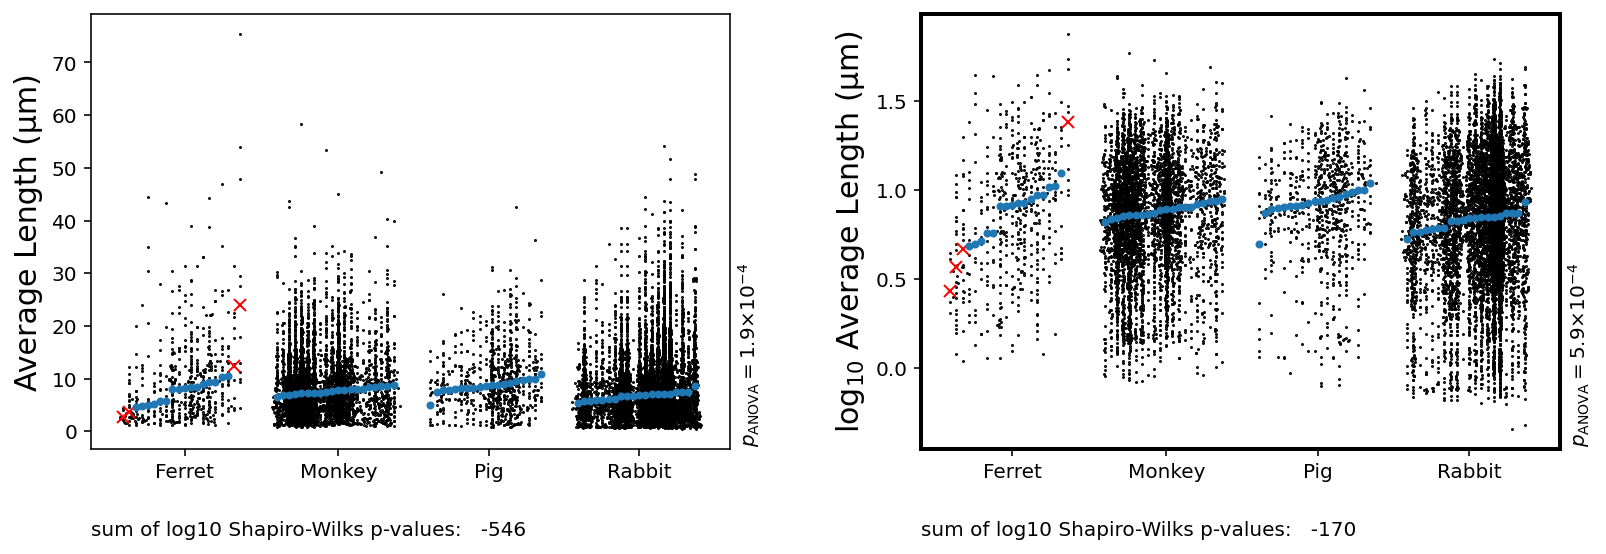

Top 5 Percent Length
Dataset looks more normal-like in log scale


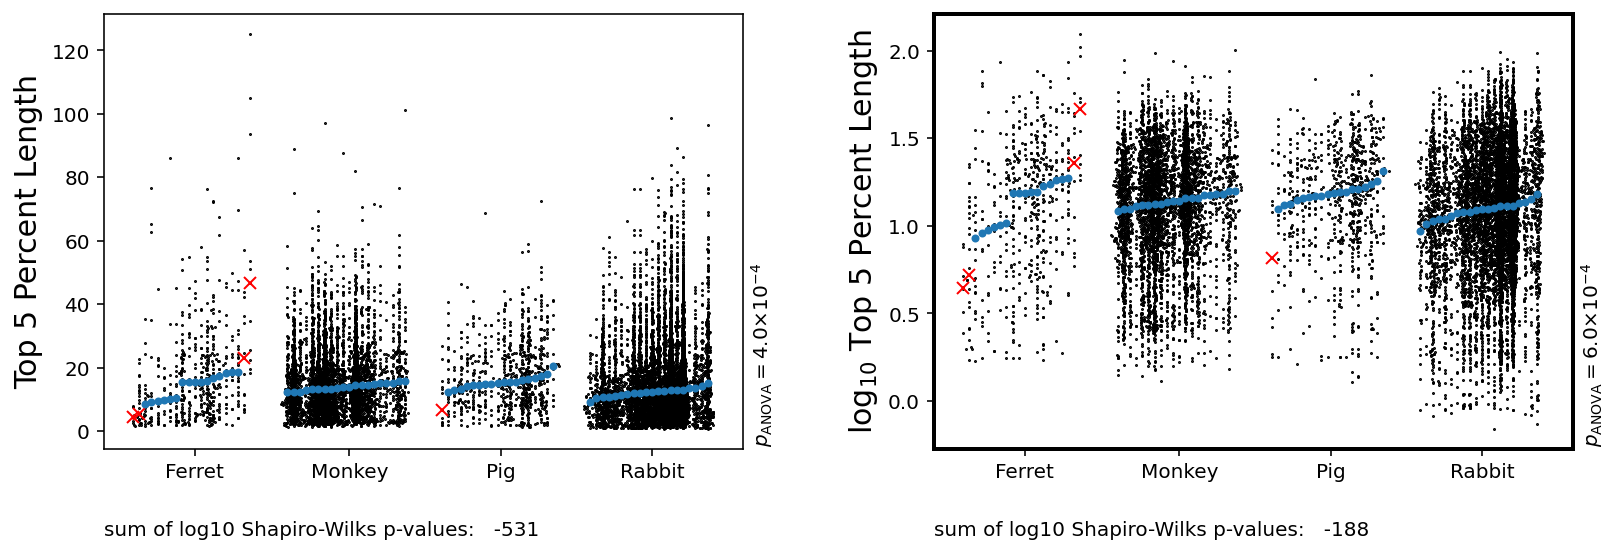

CV of Lengths
Dataset looks more normal-like in lin scale


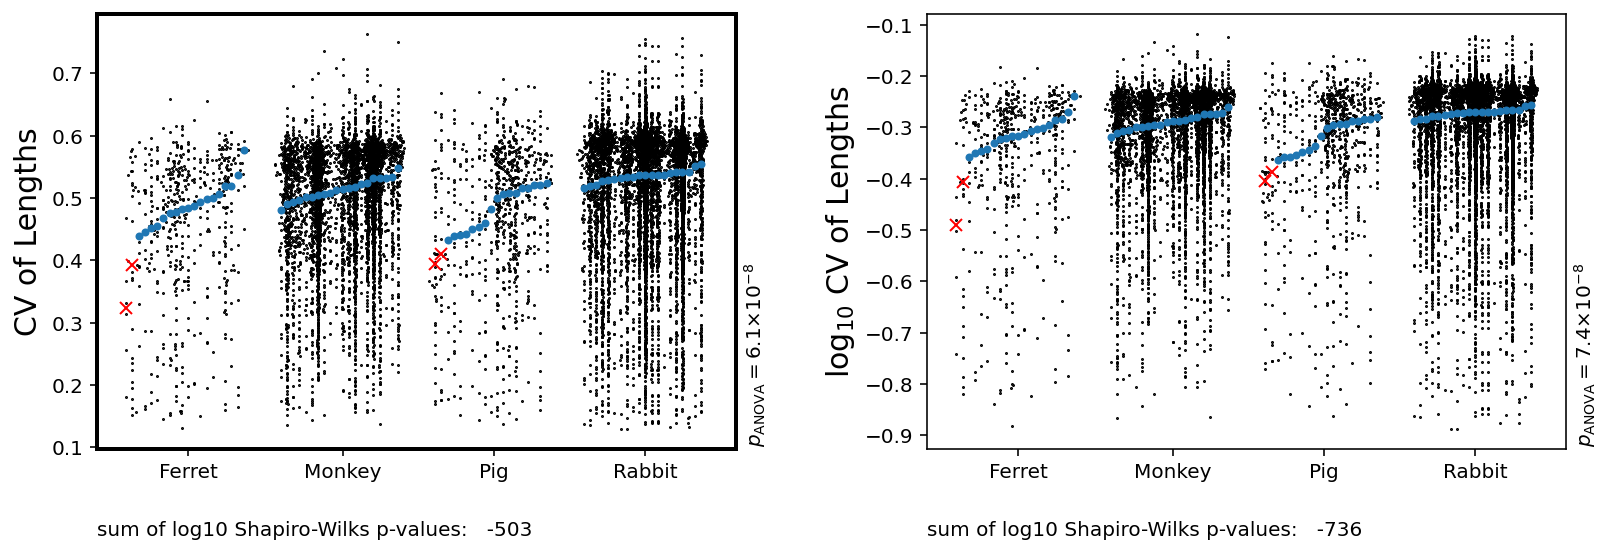

Average Angle
Angles need to be looked at in linear scale.


/tmp/ipykernel_16769/1821775053.py:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)
/opt/tljh/user/envs/physio_clean/lib/python3.8/site-packages/scipy/spatial/_kdtree.py:51: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(y-x)**p, axis=-1)


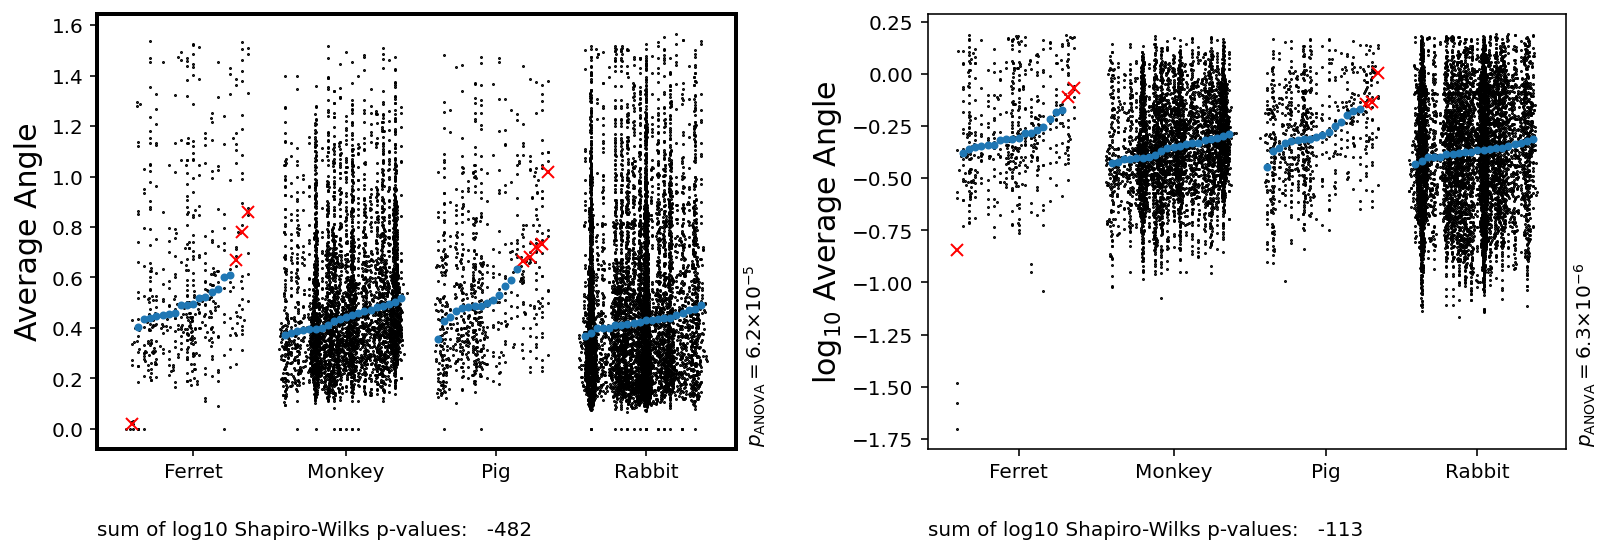

In [316]:
Anovas = []
for var in tqdm(variables[:]):
    fig, axs = plt.subplots(1,2,figsize=(12,4))
    print(var)
    
    datavar = data[[var,"specie","islet"]].copy()
#     if "angle" in var.lower():
#         print ("transforming angles into degrees for easier interpretation")
#         datavar[var] = datavar[var]/np.pi*180
        
    Collect = {
        "log": pd.DataFrame([{"islet":isl, "specie": df['specie'].iloc[0],
                              "y":np.log10(df[var].median()),
                              "log10_SW_pv": np.log10(shapiro(np.log10(df[var])).pvalue+1e-50)} for isl, df in datavar[datavar[var]>0].groupby("islet") if len(df)>minN]),
    }
    if len(Collect['log'])>1:
        Collect.update({
            "lin": pd.DataFrame([{"islet":isl, "specie": df['specie'].iloc[0],
                                  "y":df[var].median(),
                                  "log10_SW_pv": np.log10(shapiro(df[var]).pvalue+1e-50)} for isl, df in datavar.groupby("islet") if len(df)>minN]),
        })
    else:
        Collect = {
            "lin": pd.DataFrame([{"islet":isl, "specie": df['specie'].iloc[0],
                                  "y":df[var].median()} for isl, df in datavar.groupby("islet") if len(df)>minN]),
        }
        
    for k in Collect:
        collect = Collect[k]
        med = collect['y'].median()
        std = mad2std * median_abs_deviation(collect['y'])
        validIslets = list(collect.query(f"y>{med-toll*std} and y<{med+toll*std}")['islet'])
        collect["valid"] = collect['islet'].isin(validIslets)
    if len(Collect)>1:
        log10SWpvSum = pd.Series({k:Collect[k][Collect[k]["valid"]]['log10_SW_pv'].sum() for k in Collect})
        choose = log10SWpvSum.idxmax()
    else:
        print ("logging this is meaningless, skipping analysis on logged dataset")
        choose = "lin"
        axs[1].remove()
        axs = axs[:1]
    if "angle" in var.lower():
        print("Angles need to be looked at in linear scale.")
        choose = "lin"
    else:
        print(f"Dataset looks more normal-like in {choose} scale")
        
    

    for scale,ax in zip(["lin","log"],axs):
        ylbl = var
        if scale=="log":
            ylbl = r"$\log_{10}$ "+ ylbl
        ax.set_ylabel(ylbl, fontsize=15)
        ax.text(0,-.2,f"sum of log10 Shapiro-Wilks p-values:   {int(log10SWpvSum.loc[scale])}", transform=ax.transAxes)
        if choose==scale:
            for k in ax.spines:
                ax.spines[k].set_linewidth(2)
        xt = []
        j = 0
        collect = Collect[scale]
        collect = collect.sort_values(["specie","y"])
        for sp,df in collect.groupby("specie"):
            c = "k"
            xt += [(j+len(df)/2, sp)]
            for isl in df['islet']:
                ddf = datavar.query(f"islet=='{isl}' and specie=='{sp}'")
                y = ddf[var].values
                if scale=='log':
                    y = np.log10(y)
                ax.plot(jitter(y,dist=np.diff(np.percentile(collect['y'],[10,90]))[0]/10, amount=1)+j, y,".",c=c,ms=1)
                collected_value = df.query(f"islet=='{isl}'")
                df.loc[collected_value.index,"x"] = j
                j += 1
            j += 5
            ##
            for valid,dfv in df.groupby("valid"):
                if valid:
                    ax.plot(dfv["x"],dfv["y"],".",c='C0')
                else:
                    ax.plot(dfv["x"],dfv["y"],"x",c='red')
        ax.set_xticks([t[0] for t in xt])
        ax.set_xticklabels([t[1] for t in xt])

        try:
            model = sm.OLS.from_formula("y ~ C(specie)", data = collect[collect.valid])
            result, warn = mf.silent_fit(model)
            pvtext = r"$p_{\rm ANOVA} = {%s}$"%mf.expFormat(result.f_pvalue)
            if scale==choose:
                Anovas += [(var, result.f_pvalue)]
        except ValueError:
            pvtext = "Could not perform ANOVA"
        ax.text(1.01, .02, pvtext, transform = ax.transAxes, rotation=90)
    plt.subplots_adjust(wspace=.3, right=.95, left=.1)
    plt.savefig(maindir.joinpath(var.replace(" ","_")+".png"), dpi=200)
#     plt.close(fig)
    plt.show()
    #     break

In [317]:
from statsmodels.stats.multitest import fdrcorrection

In [318]:
Anovas = pd.DataFrame(Anovas)

In [319]:
Anovas.columns = ['variable',"pvalue"]

In [320]:
Anovas["corr_pv"] = fdrcorrection(Anovas["pvalue"].values)[1]

In [321]:
Anovas.sort_values('corr_pv')

,variable,pvalue,corr_pv
9,Volume (µm³),1.984032e-13,3.174451e-12
4,Branch Order,3.729514e-11,2.983611e-10
0,Mean Diameter (µm),9.751096e-11,5.200584e-10
5,Mean Tortuosity (µm),4.513534e-09,1.203609e-08
6,Min Tortuosity (µm),4.513534e-09,1.203609e-08
7,Max Tortuosity (µm),4.513534e-09,1.203609e-08
8,Surface Area (µm²),3.188560e-08,7.288136e-08
14,CV of Lengths,6.087108e-08,1.217422e-07
2,Longest Path Length (µm),1.196863e-06,1.914981e-06
3,Shortest Path Length (µm),1.196863e-06,1.914981e-06
